**Part 0 : Import data**

In [361]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
data=pd.read_csv('/content/drive/My Drive/Data/amazon_alexa.tsv',sep='\t')

In [364]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# Visualisation 

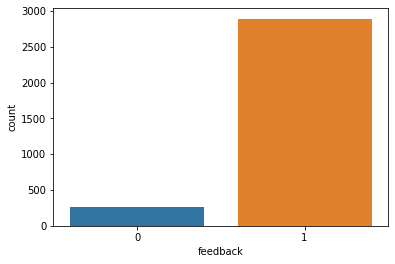

In [366]:
sns.countplot(data['feedback'])

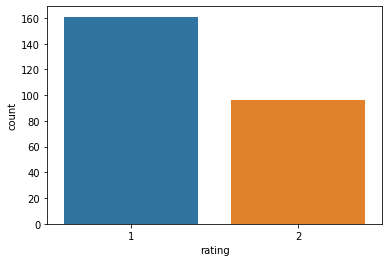

In [367]:
sns.countplot(data[data['feedback']==0]['rating'])

#data cleaning

In [368]:
df = data.drop(['date','rating'],axis=1)

In [369]:
variation_dum=pd.get_dummies(df['variation'],drop_first=True)

In [370]:
df.drop(['variation'],axis=1,inplace=True)

In [371]:
df_alexa= pd.concat([df,variation_dum],axis=1)

In [372]:
!pip install nltk

In [374]:
import nltk
import string
nltk.download('stopwords')
string.punctuation
from nltk.corpus import stopwords
stopwords.words('english')
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [375]:
#Reviews= df_alexa['verified_reviews'].apply(message_cleaning)

In [376]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() #analyzer=message_cleaning)
Reviews=vectorizer.fit_transform(df_alexa['verified_reviews'])

In [377]:
df_alexa.drop('verified_reviews',axis=1,inplace=True)

In [378]:
Reviews=pd.DataFrame(Reviews.toarray())
df_alexa = pd.concat([df_alexa , Reviews], axis=1)

In [379]:
df_alexa.shape

(3150, 4060)

In [380]:
X=df_alexa.drop('feedback',axis=1)
y=df_alexa['feedback']
n,m= X.shape

In [381]:
y.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [382]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y , random_state=0)

In [523]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(400,activation='relu',input_shape=(m,)))
model.add(Dropout(0.5))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [524]:
y_train.shape

weights = {0:8, 1:91}

In [525]:
epochs_hist=model.fit(X_train,y_train,class_weight=weights,epochs=20,validation_data=(X_test,y_test)) #,class_weight=weights

Epoch 1/20
79/79 [==============================] - 2s 23ms/step - loss: 8.9294 - accuracy: 0.9095 - val_loss: 0.3421 - val_accuracy: 0.9190
Epoch 2/20
79/79 [==============================] - 2s 20ms/step - loss: 2.5463 - accuracy: 0.9183 - val_loss: 0.2750 - val_accuracy: 0.9190
Epoch 3/20
79/79 [==============================] - 2s 20ms/step - loss: 1.6734 - accuracy: 0.9190 - val_loss: 0.2892 - val_accuracy: 0.9206
Epoch 4/20
79/79 [==============================] - 2s 20ms/step - loss: 1.1203 - accuracy: 0.9425 - val_loss: 0.3218 - val_accuracy: 0.9397
Epoch 5/20
79/79 [==============================] - 2s 20ms/step - loss: 0.7058 - accuracy: 0.9754 - val_loss: 0.3829 - val_accuracy: 0.9397
Epoch 6/20
79/79 [==============================] - 2s 20ms/step - loss: 0.8891 - accuracy: 0.9794 - val_loss: 0.3767 - val_accuracy: 0.9492
Epoch 7/20
79/79 [==============================] - 2s 20ms/step - loss: 0.8073 - accuracy: 0.9821 - val_loss: 0.5202 - val_accuracy: 0.9508
Epoch 8/20
79

In [526]:
from sklearn.metrics import confusion_matrix ,f1_score

In [527]:
y_pred = model.predict(X_test)

In [528]:
y_pred = (y_pred>0.5)

F1 :  0.9735269000853972


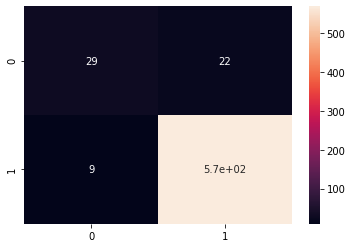

In [529]:
cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
sns.heatmap(cm,annot=True)
print('F1 : ' , f1)